<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/Hello-World/blob/master/tf2_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Tutorial images
https://www.tensorflow.org/tutorials/load_data/images

## 設定

In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0'

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## データセットのダウンロードと検査

### 画像のダウンロード

In [3]:
import pathlib
URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_root_orig = tf.keras.utils.get_file(fname='flower_photos', origin=URL, untar=True)

228818944/228813984 [==============================] - 6s 0us/step


In [4]:
data_root_orig

'/root/.keras/datasets/flower_photos'

In [5]:
data_root = pathlib.Path(data_root_orig)
print(data_root)

/root/.keras/datasets/flower_photos


In [7]:
%ls /root/.keras/datasets/flower_photos

daisy/  dandelion/  LICENSE.txt  roses/  sunflowers/  tulips/


In [8]:
for item in data_root.iterdir():
    print(item)

/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/LICENSE.txt


In [0]:
all_image_paths = list(map(str, data_root.glob('*/*')))

In [0]:
import random
random.shuffle(all_image_paths)

In [15]:
image_count = len(all_image_paths)
image_count

3670

In [16]:
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/dandelion/2512977446_ac498955ee.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/14858674096_ed0fc1a130.jpg',
 '/root/.keras/datasets/flower_photos/tulips/8713396140_5af8136136.jpg',
 '/root/.keras/datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14116780333_7836f4448c.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/9216286162_6ceefdd1b4_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/3540595981_73f14d1227_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/2625836599_03e192266f.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14651383746_419dc73634_m.jpg',
 '/root/.keras/datasets/flower_photos/daisy/3750250718_eb61146c5f.jpg']

### 画像の確認

In [23]:
type(data_root/"LICENSE.txt")

pathlib.PosixPath

In [24]:
data_root/"LICENSE.txt"

PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt')

In [52]:
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()
attributions[:8]

['All images in this archive are licensed under the Creative Commons By-Attribution License, available at:\n',
 'https://creativecommons.org/licenses/by/2.0/\n',
 'The photographers are listed below, thanks to all of them for making their work available, and please be sure to credit them for any use as per the license.\n',
 '\n',
 'daisy/7568630428_8cf0fc16ff_n.jpg CC-BY by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg CC-BY by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg CC-BY by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg CC-BY by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n']

In [53]:
attributions = [line.split(' CC-BY') for line in attributions[4:]]
attributions[:4]

[['daisy/7568630428_8cf0fc16ff_n.jpg',
  ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n'],
 ['daisy/7410356270_9dff4d0e2e_n.jpg',
  ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n'],
 ['daisy/4286053334_a75541f20b_m.jpg',
  ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n'],
 ['daisy/10770585085_4742b9dac3_n.jpg',
  ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n']]

In [0]:
attributions = dict(attributions)

In [0]:
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

In [0]:
from IPython import display

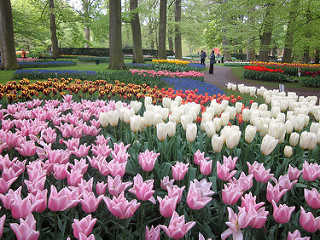

Image (CC BY 2.0) by tcfairyqueen


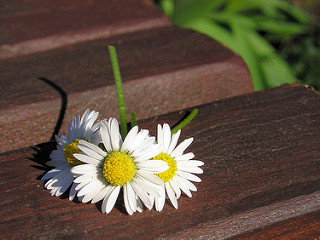

Image (CC BY 2.0) by Maja Dumat


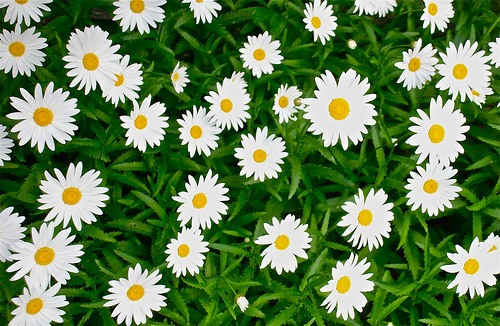

Image (CC BY 2.0) by Rex Hammock


In [61]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))

### 各画像のラベルの関連付け

In [62]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [63]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]

In [66]:
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [1, 3, 4, 2, 4, 3, 4, 1, 4, 0]


In [67]:
all_image_paths[:10]

['/root/.keras/datasets/flower_photos/dandelion/2512977446_ac498955ee.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/14858674096_ed0fc1a130.jpg',
 '/root/.keras/datasets/flower_photos/tulips/8713396140_5af8136136.jpg',
 '/root/.keras/datasets/flower_photos/roses/8523394349_61b31fdd8f_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14116780333_7836f4448c.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/9216286162_6ceefdd1b4_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/3540595981_73f14d1227_n.jpg',
 '/root/.keras/datasets/flower_photos/dandelion/2625836599_03e192266f.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14651383746_419dc73634_m.jpg',
 '/root/.keras/datasets/flower_photos/daisy/3750250718_eb61146c5f.jpg']

### 画像の読み込みと整形

In [68]:
img_path = all_image_paths[0]
img_path

'/root/.keras/datasets/flower_photos/dandelion/2512977446_ac498955ee.jpg'

In [70]:
img_raw = tf.io.read_file(img_path)
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1e\x00\x00\x02\x03\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x04\x07\x08\x02\x03\t\x00\x01\n\xff\xc4\x00I\x10\x00\x02\x01\x03\x03\x02\x05\x02\x04\x04\x04\x04\x04\x05\x00\x0b\x01\x02\x03\x04\x05\x11\x06\x12!\x001\x07\x13"AQ\x14a\x082q\x81\x15#B\x91\x16R\

In [74]:
img_tensor = tf.image.decode_image(img_raw)
img_tensor.shape, img_tensor.dtype

(TensorShape([375, 500, 3]), tf.uint8)

In [77]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final /= 255.0
img_final.shape, img_final.numpy().min(), img_final.numpy().max()

(TensorShape([192, 192, 3]), 0.00010499697, 1.0)

### 画像処理用の関数作成

In [0]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0
    return image

In [0]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

Text(0.5, 1.0, 'dandelion')

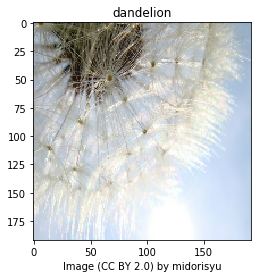

In [82]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label])

## tf.data.Datasetの構築

### 画像のデータセット

In [85]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [0]:
image_ds = path_ds.map(load_and_preprocess_image)

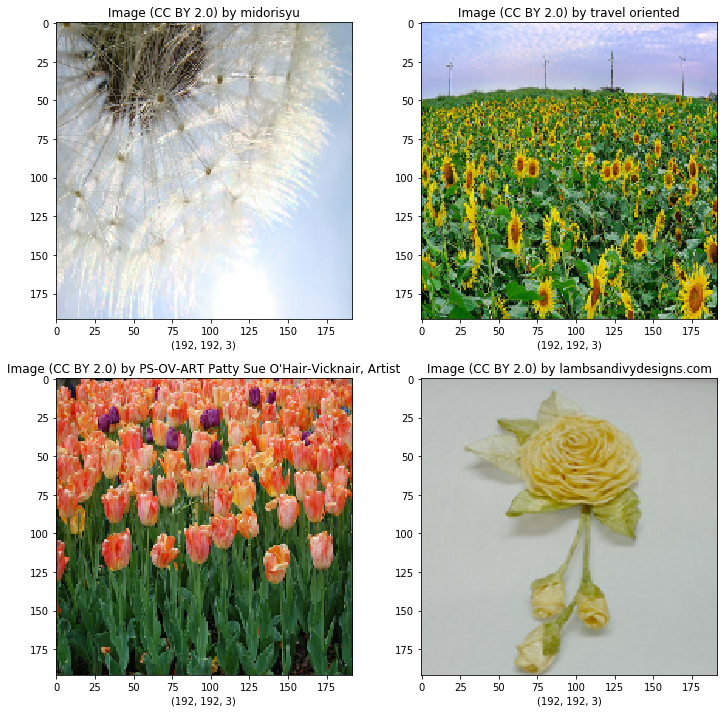

In [95]:
plt.figure(figsize=(12,12))
for i, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,i+1)
    plt.imshow(image)
    plt.title(caption_image(all_image_paths[i]))
    plt.xlabel(image.shape)
plt.show()

### (image, label)のペアのデータセット

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int32))

In [105]:
for label in label_ds.take(10):
    print(int(label), label_names[label])

1 dandelion
3 sunflowers
4 tulips
2 roses
4 tulips
3 sunflowers
4 tulips
1 dandelion
4 tulips
0 daisy


In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [107]:
image_label_ds.take(2)

<TakeDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

### 学習用にデータセットをバッチ化する

In [0]:
BATCH_SIZE = 32

In [113]:
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
ds

<BatchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

### Model

In [114]:
model = tf.keras.applications.MobileNetV2(input_shape=(192,192,3), include_top=False)

9412608/9406464 [==============================] - 2s 0us/step


In [0]:
model.trainable = False

In [123]:
help(tf.keras.applications.mobilenet_v2.preprocess_input)

Help on function wrapper in module tensorflow.python.keras.applications:

wrapper(*args, **kwargs)



In [0]:
def change_range(image, label):
    return 2*image-1, label

In [0]:
keras_ds = ds.map(change_range)

In [0]:
image_batch, label_batch = next(iter(keras_ds))

In [129]:
image_batch.shape, label_batch.shape

(TensorShape([32, 192, 192, 3]), TensorShape([32]))

In [131]:
feature_map_batch = model(image_batch)
feature_map_batch.shape

TensorShape([32, 6, 6, 1280])

In [0]:
model = tf.keras.Sequential([
                             model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(len(label_names))
])

In [134]:
logit_batch = model(image_batch).numpy()
logit_batch.shape, logit_batch.min(), logit_batch.max()

((32, 5), -3.2017984, 1.7993894)

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [139]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(1280, 5) dtype=float32, numpy=
 array([[ 0.00590625,  0.05750364,  0.03650534,  0.00454818,  0.05340618],
        [-0.05182996, -0.00415399, -0.06152261,  0.01808441, -0.03509017],
        [-0.05215337, -0.05889124, -0.00468335, -0.00839909, -0.03158507],
        ...,
        [-0.05230728, -0.05071459, -0.06485205, -0.03154404, -0.04333394],
        [ 0.02764084,  0.01499274,  0.04277848, -0.02126101, -0.06126561],
        [ 0.06733742, -0.00224555,  0.01402646, -0.01606039, -0.02006705]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]

In [140]:
len(model.trainable_variables)

2

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [143]:
steps_per_epoch = tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [145]:
%%time
model.fit(ds, epochs=2, steps_per_epoch=steps_per_epoch)

Train for 115.0 steps
Epoch 1/2
115/115 [==============================] - 16s 141ms/step - loss: 1.6003 - accuracy: 0.4514
Epoch 2/2
115/115 [==============================] - 10s 83ms/step - loss: 1.6015 - accuracy: 0.4185
CPU times: user 25 s, sys: 1.86 s, total: 26.9 s
Wall time: 25.9 s


## 性能

In [0]:
import time
default_timeit_steps = 2*steps_per_epoch+1

def timeit(ds, steps=default_timeit_steps):
  overall_start = time.time()
  # Fetch a single batch to prime the pipeline (fill the shuffle buffer),
  # before starting the timer
  it = iter(ds.take(steps+1))
  next(it)

  start = time.time()
  for i,(images,labels) in enumerate(it):
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))
  print("Total time: {}s".format(end-overall_start))

In [152]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [153]:
timeit(ds)

........................
231.0 batches: 13.68640923500061 s
540.09784 Images/s
Total time: 20.58233070373535s


In [154]:
timeit(ds)

........................
231.0 batches: 14.106506109237671 s
524.01353 Images/s
Total time: 20.862627029418945s


In [155]:
ds = image_label_ds.cache()
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [156]:
timeit(ds)

........................
231.0 batches: 0.9488601684570312 s
7790.39973 Images/s
Total time: 7.490889549255371s


In [157]:
timeit(ds)

........................
231.0 batches: 0.9712960720062256 s
7610.44980 Images/s
Total time: 0.9887349605560303s


In [158]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE).prefetch(1)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [159]:
timeit(ds)

........................
231.0 batches: 3.033857583999634 s
2436.50198 Images/s
Total time: 17.156787872314453s


In [160]:
timeit(ds)

........................
231.0 batches: 2.8985114097595215 s
2550.27459 Images/s
Total time: 3.817603826522827s


## TFRecord

In [0]:
image_ds = tf.data.Dataset.from_tensor_slices(all_image_paths).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(image_ds)

In [0]:
image_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [163]:
ds = tf.data.Dataset.zip((image_ds, label_ds))
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [164]:
timeit(ds)

........................
231.0 batches: 12.960744380950928 s
570.33761 Images/s
Total time: 18.911964654922485s


In [165]:
paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
image_ds = paths_ds.map(load_and_preprocess_image)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [166]:
ds = image_ds.map(tf.io.serialize_tensor)
ds

<MapDataset shapes: (), types: tf.string>

In [0]:
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(ds)

In [168]:
ds = tf.data.TFRecordDataset('images.tfrec')

def parse(x):
  result = tf.io.parse_tensor(x, out_type=tf.float32)
  result = tf.reshape(result, [192, 192, 3])
  return result

ds = ds.map(parse, num_parallel_calls=AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [169]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [170]:
timeit(ds)

........................
231.0 batches: 12.406380653381348 s
595.82244 Images/s
Total time: 14.890081405639648s
